# Step A: Data Preprocessing

## import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator

## import the dataset

In [2]:
data = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)
training_set = data.flow_from_directory('TRAIN',
                                       target_size = (32, 32),
                                       color_mode="rgb",
                                       class_mode = 'categorical',
                                       batch_size = 32,
                                       shuffle = True,
                                       seed = 42,
                                       subset = 'training')


Found 9957 images belonging to 4 classes.


In [3]:
data2 = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)
test_set = data2.flow_from_directory('TEST',
                                       target_size = (32, 32),
                                       color_mode="rgb",
                                       batch_size = 32,
                                       class_mode = 'categorical')

Found 2487 images belonging to 4 classes.


## Visualisation of some examples of different categories of blood cells

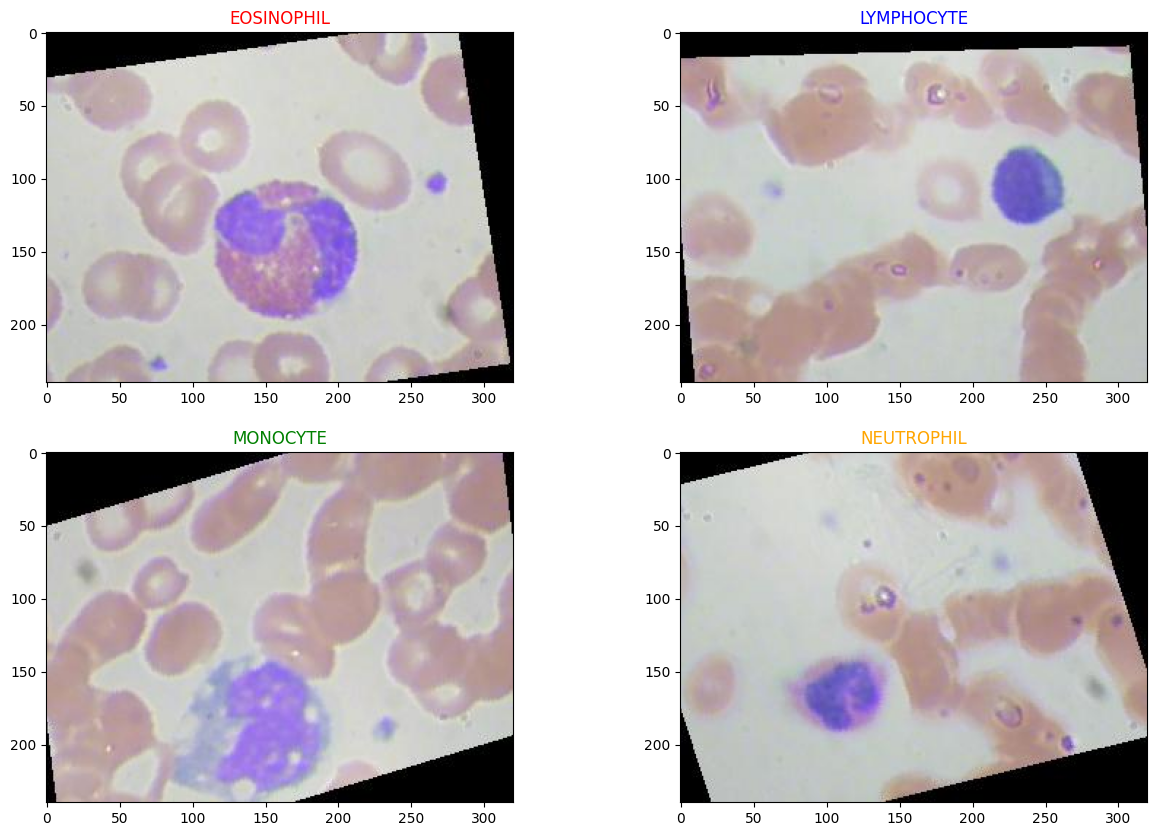

In [10]:
img1 = mpimg.imread('TEST\EOSINOPHIL\_0_967.jpeg')
img2 = mpimg.imread('TEST\LYMPHOCYTE\_0_1050.jpeg')
img3 = mpimg.imread('TEST\MONOCYTE\_0_531.jpeg')
img4 = mpimg.imread('_0_1469.jpeg')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax1.imshow(img1)
ax1.set_title("EOSINOPHIL",color='red')
ax2.imshow(img2)
ax2.set_title("LYMPHOCYTE",color='blue')
ax3.imshow(img3)
ax3.set_title("MONOCYTE",color='green')
ax4.imshow(img4)
ax4.set_title("NEUTROPHIL",color='orange')

plt.show()




# Step B: CNN Model

## Part 1: Building the CNN Model

### Initializing the CNN

In [11]:
cnn_model = tf.keras.models.Sequential()

### Convolution and Pooling

In [12]:
cnn_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = [32, 32, 3]))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2)) 

### Adding a second Convolution Layer

In [13]:
cnn_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2)) 

### Adding a third Convolution Layer

In [14]:
cnn_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

### Flattening

In [15]:
cnn_model.add(Flatten())

### Full Connection

In [16]:
cnn_model.add(Dense(128,activation='relu'))

### Output Layer

In [17]:
cnn_model.add(Dense(units=4,activation='softmax'))

### Compile the model

In [18]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Part 2: Train the Model

In [19]:
history = cnn_model.fit(training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
312/312 [==============================] - 391s 1s/step - loss: 1.3183 - accuracy: 0.3282 - val_loss: 1.1277 - val_accuracy: 0.4869
Epoch 2/50
312/312 [==============================] - 123s 392ms/step - loss: 1.1290 - accuracy: 0.4702 - val_loss: 1.0066 - val_accuracy: 0.5219
Epoch 3/50
312/312 [==============================] - 55s 175ms/step - loss: 0.9904 - accuracy: 0.5541 - val_loss: 0.8003 - val_accuracy: 0.6542
Epoch 4/50
312/312 [==============================] - 55s 177ms/step - loss: 0.7933 - accuracy: 0.6577 - val_loss: 0.8170 - val_accuracy: 0.6417
Epoch 5/50
312/312 [==============================] - 52s 167ms/step - loss: 0.6918 - accuracy: 0.6948 - val_loss: 0.8514 - val_accuracy: 0.6224
Epoch 6/50
312/312 [==============================] - 48s 155ms/step - loss: 0.6124 - accuracy: 0.7364 - val_loss: 0.6247 - val_accuracy: 0.7358
Epoch 7/50
312/312 [==============================] - 50s 159ms/step - loss: 0.5475 - accuracy: 0.7627 - val_loss: 0.5726 - val_acc

### Plotting the Training Loss and Validation Loss

Text(0.5, 1.0, 'plot of loss function')

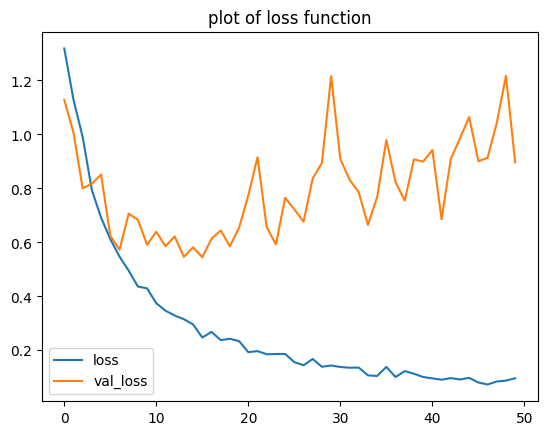

In [20]:
model_losses= pd.DataFrame(cnn_model.history.history)
model_losses['loss']
plt.plot(model_losses['loss'],label='loss')
plt.plot(model_losses['val_loss'],label='val_loss')
plt.legend()
plt.title('plot of loss function')

### Plotting the training accuracy and validation accuracy

Text(0.5, 1.0, 'plot of accuracy function')

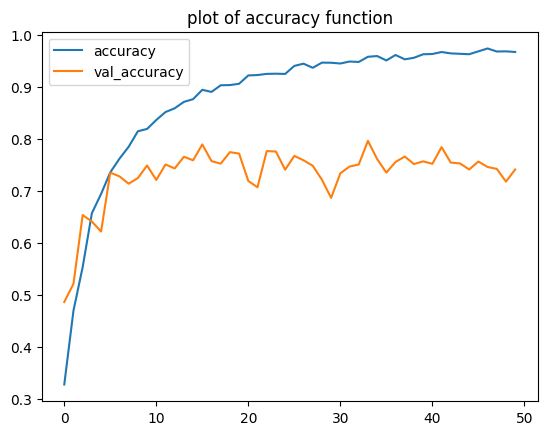

In [21]:
plt.plot(model_losses['accuracy'],label='accuracy')
plt.plot(model_losses['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('plot of accuracy function')

### Combined plot of Accuracy and Losses

<AxesSubplot:>

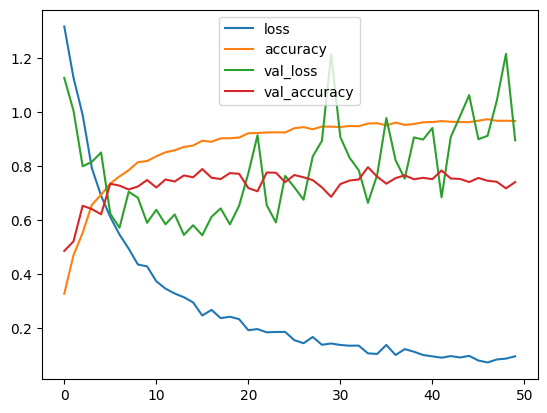

In [22]:
model_losses.plot()

## Part 3:Evaluate the model

In [23]:
score = cnn_model.evaluate(test_set,verbose=0)
score

[0.8483080863952637, 0.7587454915046692]

In [24]:
print('Test Loss: {:.2f}'.format(score[0]))
print('Test Accuracy: {:.2f}'.format(score[1]))

Test Loss: 0.85
Test Accuracy: 0.76


## Part 4: Prediction

In [25]:
from keras.preprocessing.image import image_utils
predict_image = image_utils.load_img('TEST\EOSINOPHIL\_0_196.jpeg',target_size = (32,32))
print(predict_image.mode)
print(predict_image.size)

RGB
(32, 32)


In [26]:
predict_image = image_utils.img_to_array(predict_image)
print(predict_image.dtype)
print(predict_image.shape)
predict_image = np.expand_dims(predict_image,axis = 0)
result = cnn_model.predict(predict_image)

float32
(32, 32, 3)
1/1 [==============================] - 1s 664ms/step


In [27]:
training_set.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [28]:
result

array([[0., 0., 1., 0.]], dtype=float32)

In [29]:
if result[0][0] == 0.:
    prediction = 'EOSINOPHIL'
    print(prediction)
elif result[0][0] == 1. :
    prediction = 'LYMPHOCYTE'
    print(prediction)
elif result[0][0] == 2 :
    prediction = 'MONOCYTE'
    print(prediction)
elif result[0][0] == 3:
    prediction = 'NEUTROPHIL'
    print(prediction)

EOSINOPHIL
